In [ ]:
#Estre programa contém os código demonstrados na aula sobre Aplicação de ML+IoT para o Healthcare(previsão de arritmia)

In [1]:
#importando as bibiliotecas
import pandas as pd #biblioteca utilizada para tratar os dados em formato de dataframe
import numpy as np # biblioteca utilizada para tratar vetores e matrizesimport matplotlib.pyplot as plt  #utilizapa para construir os gráficos em um formato similar ao "Matlab"
from sklearn.preprocessing import MinMaxScaler, LabelEncoder #utilizada para realizar o preprocessamento dos dados
from sklearn.model_selection import train_test_split #utilizada para realizar o divisão entre dados para treinamento e teste
from sklearn.metrics import confusion_matrix, accuracy_score #utilizada para verificar a acurácia do modelo construído
from sklearn.naive_bayes import GaussianNB # utilizada para construir o modelo de classificação naive_bayes
import seaborn as sns #utilizada para constuir os gráficos em uma forma mais "bonita"
import matplotlib.pyplot as plt #biblioteca para realizar a construção dos gráficos
from sklearn.svm import SVC #utilizada para importar o algoritmo SVM

In [3]:
#lendo o dataset no formato de dataframe atraves da funcao "read" do pandas
nomeArquivo = '/home/igorbaio/Documentos/BootcampAnalistaMachineLearning/Cap5/data.csv'
dataset = pd.read_csv(nomeArquivo, sep=",")#realiza a leitura do banco de dados

In [4]:
#print do dataset
dataset.head()

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,pncaden,chest pain type,resting bp s,...,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
0,1254,0,40,1,1,0,0.0,NaN,2,140.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
1,1255,0,49,0,1,0,0.0,NaN,3,160.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
2,1256,0,37,1,1,0,0.0,NaN,2,130.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
3,1257,0,48,0,1,1,1.0,NaN,4,138.0,...,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
4,1258,0,54,1,1,0,1.0,NaN,3,150.0,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name


In [6]:
dataset.shape

(617, 76)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           617 non-null    int64  
 1   ccf                           617 non-null    int64  
 2   age                           617 non-null    int64  
 3   sex                           617 non-null    int64  
 4   pain location                 617 non-null    int64  
 5   pain w exertion               617 non-null    int64  
 6   relieved after rest           613 non-null    float64
 7   pncaden                       0 non-null      float64
 8   chest pain type               617 non-null    int64  
 9   resting bp s                  558 non-null    float64
 10  hypertension                  583 non-null    float64
 11  cholesterol                   587 non-null    float64
 12  smoker                        230 non-null    float64
 13  cigar

In [8]:
dataset.describe()

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,pncaden,chest pain type,resting bp s,...,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13
count,617.000000,617.0,617.000000,617.000000,617.000000,617.000000,613.000000,0.0,617.000000,558.000000,...,327.000000,372.000000,347.000000,598.000000,598.000000,598.000000,598.000000,601.000000,311.000000,119.000000
mean,1325.489465,0.0,53.055105,0.842788,0.920583,0.593193,0.672104,NaN,3.294976,132.372760,...,1.067278,1.470430,1.207493,1.030100,1.048495,1.132107,1.705686,1.194676,27.623119,5.869748
std,1294.916561,0.0,9.582869,0.364296,0.270607,0.491637,0.469830,NaN,0.913743,19.828097,...,0.250887,0.499797,0.406097,0.336148,0.503910,0.673205,1.834072,0.541946,31.675295,1.650914
min,1.000000,0.0,28.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.220000,3.300000
25%,157.000000,0.0,47.000000,1.000000,1.000000,0.000000,0.000000,NaN,3.000000,120.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.685000,4.800000
50%,1120.000000,0.0,54.000000,1.000000,1.000000,1.000000,1.000000,NaN,4.000000,130.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.820000,5.600000
75%,1282.000000,0.0,60.000000,1.000000,1.000000,1.000000,1.000000,NaN,4.000000,142.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63.000000,6.900000
max,5002.000000,0.0,77.000000,1.000000,1.000000,1.000000,1.000000,NaN,4.000000,200.000000,...,2.000000,2.000000,2.000000,7.000000,10.000000,7.000000,8.000000,5.000000,86.000000,11.300000


In [9]:
#tratando os dados nulos
dataset.fillna(dataset.mean(), inplace = True)#substitui os dados que estao NaN pela media dos valores na coluna
dataset.head()

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,pncaden,chest pain type,resting bp s,...,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
0,1254,0,40,1,1,0,0.0,NaN,2,140.0,...,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
1,1255,0,49,0,1,0,0.0,NaN,3,160.0,...,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
2,1256,0,37,1,1,0,0.0,NaN,2,130.0,...,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
3,1257,0,48,0,1,1,1.0,NaN,4,138.0,...,2.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
4,1258,0,54,1,1,0,1.0,NaN,3,150.0,...,1.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name


In [10]:
#preparando os dados
dataset_to_array = np.array(dataset) #tranforma o dataframe em array para facilitar 
                                     #a escolha dos dados a serem utilizados

In [16]:
target = dataset_to_array[:, 57] #esse é o vetor de saida(target)
target = target.astype('int')#indica o tipo de dados
#target[target>0] = 1 #0 para o coraçao saudavel e 1 para problema detectado
target

array([0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 3, 0, 3, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 1, 2, 4, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 3, 3, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 4, 0, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 3, 0, 1, 0, 0, 2, 1, 4, 4, 4, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 4, 2, 0, 3, 0, 3, 4, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 3, 0, 0, 0, 1, 0, 3, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0,
       0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 2, 0,
       2, 3, 0, 1, 0, 2, 2, 2, 3, 4, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 1, 0, 3, 0, 2, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 4, 2,

In [19]:
#Iniciando a previsao
#dados coletados pelos sensores
dataset_sensor = np.column_stack((
    dataset_to_array[:, 11], # pressao sanguinea em repouso
    dataset_to_array[:, 33], #frequencia maxima atingida
    dataset_to_array[:, 34], #frequencia cardiaca em repouso
    dataset_to_array[:, 35], # pico de pressão sanguínea durante exercício 
    dataset_to_array[:, 36], # pico de pressão sanguínea durante exercício 
    dataset_to_array[:, 38] #pressao sanguinea em repouso
    ))

In [20]:
#dataset com os dados medicos do paciente
dataset_medico = np.column_stack((
    dataset_to_array[:, 4], #localizacao da dor
    dataset_to_array[:, 6], #alivio apos o cansaco
    dataset_to_array[:, 9], #tipo de dor
    dataset_to_array[:, 39], #angina induzida pelo exercicio (1 = sim; 0=nao)
    dataset.age,#idade
    dataset.sex,#sexo
    dataset.hypertension #hipertensao
))

In [21]:
#concatena as duas bases de dados
dataset_paciente = np.concatenate((dataset_medico,dataset_sensor), axis=1)
dataset_paciente

array([[1, 0.0, 140.0, ..., 140.0, 86.0, 0.0],
       [1, 0.0, 160.0, ..., 160.0, 90.0, 0.0],
       [1, 0.0, 130.0, ..., 130.0, 80.0, 0.0],
       ...,
       [1, 1.0, 122.0, ..., 122.0, 70.0, 0.0],
       [1, 1.0, 132.37275985663084, ..., 132.37275985663084,
        82.80465949820788, 0.028622540250447227],
       [1, 0.0, 120.0, ..., 120.0, 80.0, 0.0]], dtype=object)

In [22]:
dataset_paciente.shape

(617, 13)

In [23]:
#encontrando os dados para treinamento e teste
X_train, x_test, y_train, y_test = train_test_split(dataset_paciente, target, random_state=223)

In [24]:
#cria o objeto SVM
modelSVM = SVC(kernel = 'linear')#escolha do kernel polinomial

In [25]:
#aplica o treinamento do modelo
modelSVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
#Analisando a performance do modelo
previsao = modelSVM.predict(x_test)# aplica o modelo para os dados de teste

In [27]:
previsao

array([1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 3, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 3, 3, 0, 1, 1, 3, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 3,
       0, 0, 1, 0, 0, 1, 3, 0, 0, 1, 3, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1,
       0, 3, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 1, 0, 3, 3, 0, 1, 2, 0, 1,
       0, 0, 2, 0, 0, 2, 0, 3, 0, 0, 2, 1, 0, 1, 0, 2, 3, 0, 0, 2, 1, 1,
       1, 0, 1, 0, 1, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 1, 2, 1, 0, 1, 1,
       0, 0, 0, 0, 3, 0, 0, 3, 1, 0, 1, 0, 0, 0, 3, 1, 3, 3, 0, 1, 0, 3,
       0])

In [32]:
#encontra a acuracia do modelo de previsao utilizando o SVM
acuracia = accuracy_score(y_test,previsao)
print("Acuracia utilizando o SVM", acuracia,"\nEm porcentagem :", round(acuracia*100),"%\n")

Acuracia utilizando o SVM 0.5419354838709678 
Em porcentagem : 54.0 %



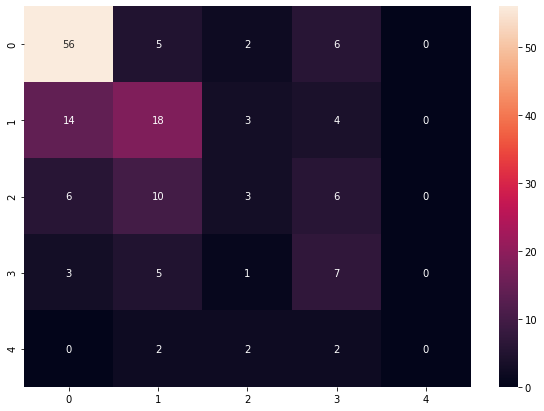

In [33]:
#criando a matriz de confusao
cm = confusion_matrix(y_test,previsao)#gera a matriz de confusao
df_cm = pd.DataFrame(cm, index = [i for i in "01234"], columns = [i for i in "01234"]) #cria o df com as classes
plt.figure(figsize = (10,7)) #indica o tamanho da figura
sns.heatmap(df_cm, annot=True)#plota a figura

In [36]:
#Modificando o Dataset
#vamos escolher apenas 13 atributos para realizar a previsão de doenças cardíacas

dataset_to_array = np.array(dataset)
label = dataset_to_array[:,57] # "Target" classes binárias 0 e 1
label = label.astype('int')
label[label>0] = 1 # Quando os dados são 0 está saldável e 1 
label

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [37]:
#encontrando os dados para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dataset_paciente, label, random_state=223)

In [38]:
#cria o objeto SVM
modelSVM = SVC(kernel = 'linear') #escolha do kernel polinomial

In [39]:
#aplica o treinamento ao modelo
modelSVM.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
previsao = modelSVM.predict(X_test) #aplica o modelo para os dados de teste
previsao

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0])

In [41]:
#encontra a acuracia do modelo de previsão utilizando o SVM 
accuracia = accuracy_score(y_test, previsao)
print ("Acuracia utilizando o SVM :" , accuracia , "\nEm porcentagem : ", round(accuracia*100) , "%\n")

Acuracia utilizando o SVM : 0.7419354838709677 
Em porcentagem :  74.0 %



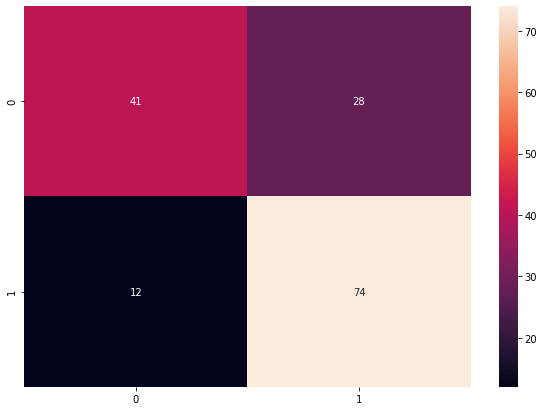

In [45]:
#matriz de confusao
cm = confusion_matrix(y_test, previsao)#gera a matriz
df_cm = pd.DataFrame(cm, index = [i for i in "01"], columns = [i for i in "01"]) #cira o df com as classes
plt.figure(figsize = (10,7))#indica o tamanho da figura
sns.heatmap(df_cm, annot=True)#plota a figura